In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns

In [28]:
import arcpy

ModuleNotFoundError: No module named 'arcpy'

## Loading and Reprojecting Data

### Parks

In [2]:
parks_gdf = gpd.read_file('Final Data/seattle_parks')
parks_gdf.head()

,NAME,geometry
0,12TH AVE SQUARE PARK,"POLYGON ((-122.31625 47.60714, -122.31625 47.6..."
1,14TH AVENUE NW BOAT RAMP,"POLYGON ((-122.37380 47.66139, -122.37380 47.6..."
2,17TH AVENUE NE CENTERSTRIP,"MULTIPOLYGON (((-122.30952 47.66651, -122.3095..."
3,3001 E MADISON,"POLYGON ((-122.29280 47.62507, -122.29283 47.6..."
4,48TH AVE SW/SW CHARLESTOWN ST,"POLYGON ((-122.39356 47.56986, -122.39356 47.5..."


In [3]:
#Use centroid and project
parks_gdf_proj = parks_gdf.to_crs('EPSG:32610')
parks_gdf_proj['geometry'] = parks_gdf_proj['geometry'].centroid

### Retail

In [4]:
retail_gdf= gpd.read_file('Final Data/seattle_retail')
retail_gdf.head()

,shop,name,geometry
0,books,University Book Store,POINT (-122.31298 47.66040)
1,car_repair,Midas,POINT (-122.30147 47.70906)
2,supermarket,Grocery Outlet,POINT (-122.29521 47.72164)
3,car,Pierre Chevrolet,POINT (-122.30051 47.71129)
4,bakery,Cupcake Royale,POINT (-122.38656 47.56122)


In [5]:
retail_gdf_proj = retail_gdf.to_crs('EPSG:32610')
retail_gdf_proj['geometry'] = retail_gdf_proj['geometry'].centroid

### Culture, Leisure, Amenities

In [6]:
cla_gdf = gpd.read_file('Final Data/culture_leisure_amenities')
cla_gdf.head()

,amenity,name,geometry
0,slipway,None,POINT (-122.27676 47.57115)
1,slipway,None,POINT (-122.29946 47.64835)
2,slipway,Ferdinand Street Boat Launch,POINT (-122.26151 47.55734)
3,slipway,None,POINT (-122.39745 47.54028)
4,picnic_table,None,POINT (-122.33925 47.69838)


In [7]:
cla_gdf_proj = cla_gdf.to_crs('EPSG:32610')
cla_gdf_proj.geometry.geom_type.unique()

array(['Point', 'Polygon', 'LineString', 'MultiPolygon'], dtype=object)

In [18]:
cla_gdf_proj = cla_gdf_proj[cla_gdf_proj.geometry.geom_type != 'LineString']

In [19]:
cla_gdf_proj['geometry'] = cla_gdf_proj['geometry'].centroid

### Transit

In [9]:
transit_gdf= gpd.read_file('Final Data/Seattle_Transit_Stops')
transit_gdf.head()

,OBJECTID,CHANGE_NUM,MINOR_CHANGE_NUM,ACCESSIBILITY_DECAL,ACCESSORY_SIGN,STOP_ID,TRANS_LINK_ID,STOP_STATUS,STOP_TYPE,AUTH_CODE,...,ON_STREET_NAME,ROUTESIGN,ROUTESIGN_OWNER,SIGN_MOUNTING_DIR,SIGNPOST,SIGNPOST_ANCHOR,SCHEDULE_HOLDER,NUM_SHELTERS,GISOBJID,geometry
0,20215,150,0,UNK,Unknown,26150,79389,CLO,REG,UNK,...,37th Ave NE,Unknown,UNK,None,Unknown,Unknown,UNK,0,100015310.0,POINT (-122.28871 47.72321)
1,5310,149,10,UNK,Unknown,26150,79389,CLO,REG,UNK,...,37th Ave NE,Unknown,UNK,None,Unknown,Unknown,UNK,0,100015310.0,POINT (-122.28871 47.72321)
2,13882,149,10,YES,None,76730,18073,ACT,REG,SEA,...,Lake City Way NE,A2 <=6 rts,KCM,Away,Light,Unknown,Double,1,8074.0,POINT (-122.29289 47.72333)
3,15134,150,0,YES,None,76730,18073,ACT,REG,SEA,...,Lake City Way NE,A2 <=6 rts,KCM,Away,Light,Unknown,Double,1,8074.0,POINT (-122.29289 47.72333)
4,22355,150,0,UNK,Unknown,38659,29894,ACT,LAY,UNK,...,35th Ave NE,Unknown,UNK,None,Unknown,Unknown,UNK,0,100016122.0,POINT (-122.29095 47.72339)


In [10]:
transit_gdf_proj = transit_gdf.to_crs('EPSG:32610')

### Sidwalks

In [11]:
sidewalks_gdf= gpd.read_file('Final Data/seattle_sidewalks')
sidewalks_gdf.head()

,geometry
0,"LINESTRING (-122.37013 47.70341, -122.37136 47..."
1,"LINESTRING (-122.37373 47.65556, -122.37448 47..."
2,"LINESTRING (-122.37171 47.65470, -122.37232 47..."
3,"LINESTRING (-122.37152 47.65484, -122.37214 47..."
4,"LINESTRING (-122.36763 47.65230, -122.37005 47..."


In [21]:
sidewalks_gdf_proj = sidewalks_gdf.to_crs('EPSG:32610')

## Analysis

### Parks

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

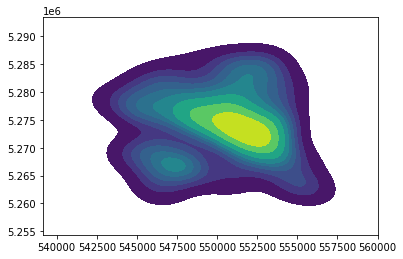

In [12]:
sns.kdeplot(parks_gdf_proj.geometry.x,parks_gdf_proj.geometry.y,shade=True, cmap='viridis')

### Retail

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

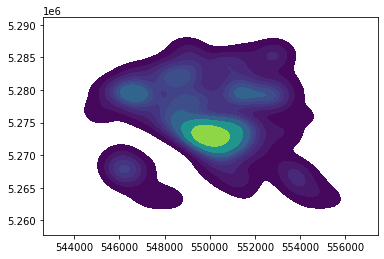

In [13]:
sns.kdeplot(retail_gdf_proj.geometry.x,retail_gdf_proj.geometry.y,shade=True, cmap='viridis')

### Transit

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

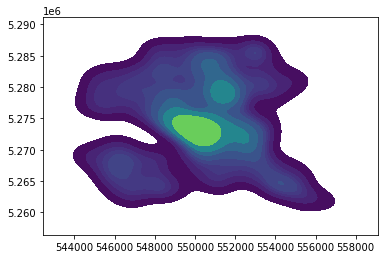

In [15]:
sns.kdeplot(transit_gdf_proj.geometry.x,transit_gdf_proj.geometry.y,shade=True, cmap='viridis')

### Amenities, Culture, and Entertainment

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

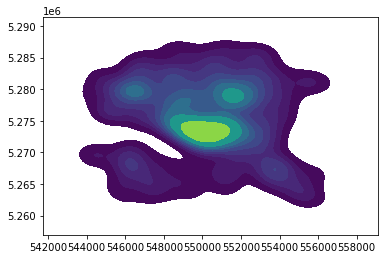

In [20]:
sns.kdeplot(cla_gdf_proj.geometry.x,cla_gdf_proj.geometry.y,shade=True, cmap='viridis')

### Pedestrian Network